In [1]:
# if you installed the nico package then uncomment and load the respective modules 

#from nico import Annotations as sann
#from nico import Interactions as sint
#from nico import Covariations as scov

import Annotations as sann
import Interactions as sint
import Covariations as scov

#import scanpy as sc
#import gseapy
#import xlsxwriter

#import numpy as np
#import time
#import os

import matplotlib as plt 


In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.1 #set the value globally

# please use Helvetica font according to your OS to make compatible with Adobe Illustrator. 
#plt.rcParams['font.family'] = 'Helvetica'
#plt.rcParams['font.sans-serif'] = ['Helvetica']

# Use the default font for all the figures 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']

import warnings
warnings.filterwarnings("ignore")

### Usage introduction 
For details of the function usage and input parameters either refer to the documentation or <br>
just write the function and add .__doc__ to retrieve infromation on all relelvant parameters.

print(sann.find_anchor_cells_between_ref_and_query.__doc__) <br>
print(sint.spatial_neighborhood_analysis.__doc__) <br>
print(scov.gene_covariation_analysis.__doc__) <br>

All the figures will be saved in `saveas=pdf` format as vector graphics by default. <br>
For every function that generates  figures, the following default parameters are used: <br>
transparent_mode=False, saveas='pdf',showit=True, dpi=300 

For saving figures in png format, set saveas='png'  <br> 
For generating images without background, set transparent_mode=True <br>
If figure outputs within the Jupyter Notebook is not desired, set showit=False <br>

Please download the sample data from the git <br>
repository https://github.com/ankitbioinfo/nico_tutorial and <br>
keep all the files and folders in the same directory to complete the tutorial. 

NiCoLRdb.txt (Ligand-receptor database file) 

annotation_save_fname= 'cerebellum.h5ad' is the low resolution sequencing based spatial transcriptomics file. <br>
In this anndata object .X slot contains the normalize matrix <br>
and in the .raw.X slot contains the count matrix

 

In [3]:
# parameters for saving plots

saveas='png'
transparent_mode=False

In [4]:
output_nico_dir='./nico_cerebellum/'
output_annotation_dir=output_nico_dir+'annotations/'
sann.create_directory(output_annotation_dir)

annotation_save_fname= 'cerebellum.h5ad'
#In this anndata .X slot contains the normalize matrix
# and in the .raw.X slot contains the count matrix

In [5]:
# parameters of the nico 
inputRadius=0
annotation_slot='rctd_first_type'

# Module A: Visualize cell type annotation of spatial data 

The figures are saved:  ./nico_cerebellum/annotations/tissue_and_umap_with_all_celltype_annotations.png


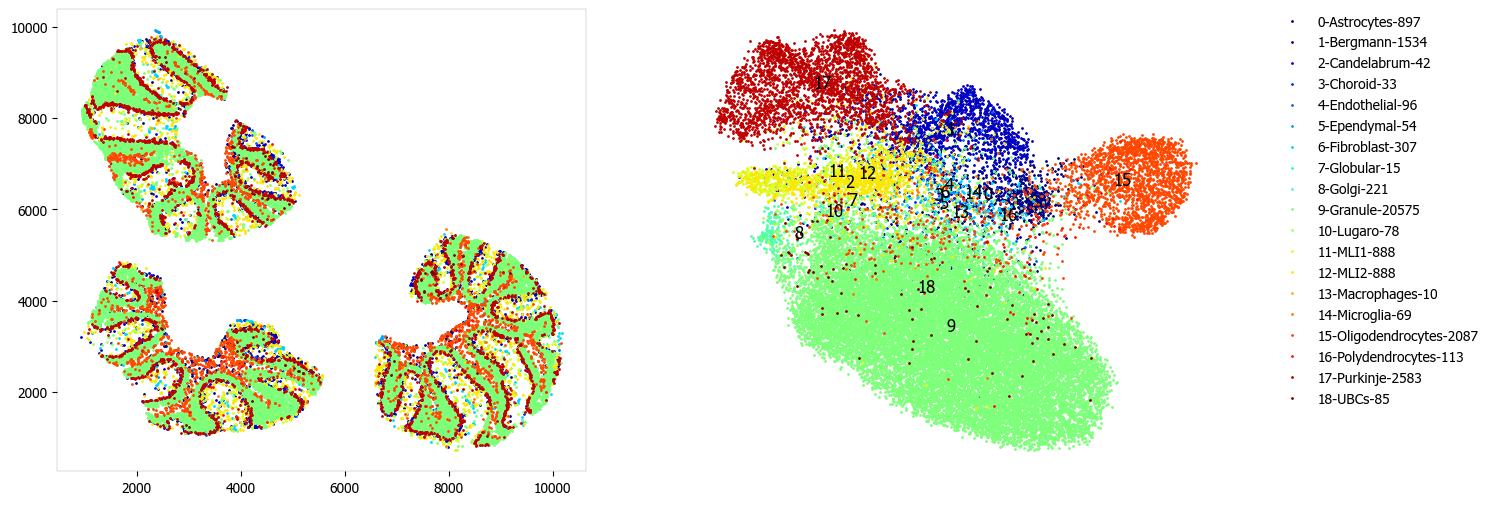

In [6]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes( 
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
spatial_coordinate_tag='spatial',
umap_tag='X_umap',
saveas=saveas,transparent_mode=transparent_mode)

### Visualize  spatial annotations of selected pairs (or larger sets) of cell types  
Left side: tissue map, Right side: UMAP 

The figures are saved:  ./nico_cerebellum/annotations/fig_individual_annotation/Purkinje0.png


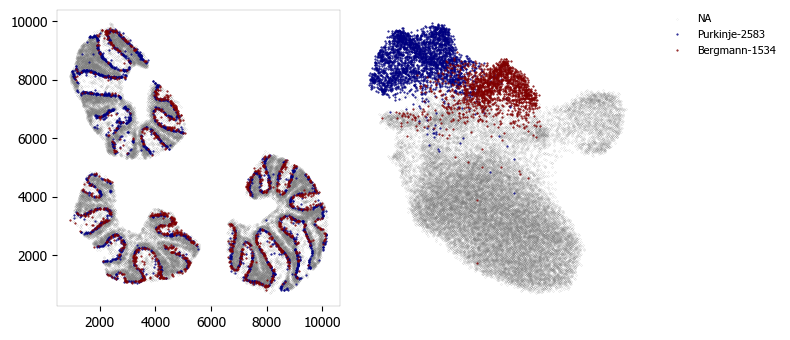

In [7]:
choose_celltypes=[['Purkinje','Bergmann']]

# For visualizing every cell type individually, leave list choose_celltypes empty.
sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
spatial_coordinate_tag='spatial',
umap_tag='X_umap',
choose_celltypes=choose_celltypes,
saveas=saveas,transparent_mode=transparent_mode)



# Module B: Infer significant niche cell type interactions 

### Radius definition 

The radius R=0 in NiCo incorporates the neighboring cells that are in immediate contact with <br>
the central cell to construct the expected neighborhood composition matrix.  <br>
We envision NiCo as a method to explore direct interactions with physical neighbors <br>
(R=0), but in principle finite distance interactions mediated by diffusive factors could be <br>
explored by increasing R and comparing to the interactions obtained with R=0.  

It may be helpful to explore a larger radius if it is expected that cell types interact through long-range <br>
interactions. However, during the covariation task immediate neighbors typically capture the <br>
strongest signal, while a larger radius averages the signal from a more significant number of <br>
cells, potentially diluting the signal. Therefore, we recommend running NiCo with R=0. 


Perform  neighborhood analysis across direct neighbors <br> 
(juxtacrine signaling, R=0) of the central niche cell type.   

To exclude cell types from the neighborhood analysis, <br> 
add celltype names to the list removed_CTs_before_finding_CT_CT_interactions. <br>
In the example below, the cell types nan, would not be included. 

In [8]:
do_not_use_following_CT_in_niche=['nan']

niche_pred_output=sint.spatial_neighborhood_analysis(
Radius=inputRadius,
output_nico_dir=output_nico_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,
removed_CTs_before_finding_CT_CT_interactions=do_not_use_following_CT_in_niche)


average neighbors: 5.8214227309893705
average distance: 30.979645956596595
data shape (30569, 21) (30569,) neighbor shape (30569, 19)
Searching hyperparameters  Grid method: 0.000244140625
Searching hyperparameters  Grid method: 0.000244140625
Inverse of lambda regularization found 0.000244140625
training (24456, 19) testing (6113, 19) coeff (19, 19)


In [9]:
# this cutoff is use for the visualization of cell type interactions network 
celltype_niche_interaction_cutoff=0.08


In some computing machine pygraphviz is not able to load the neato package automatically. 
In such case please define the location of the neato package.  
If you install pygraphviz through conda ```conda install -c conda-forge pygraphviz```
then most likely it should work. 

```
import pygraphviz
a=pygraphviz.AGraph()
a._get_prog('neato')

import os
if  not '/home/[username]/miniforge3/envs/SC/bin/' in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + '/home/[username]/miniforge3/envs/SC/bin/'
```

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.png


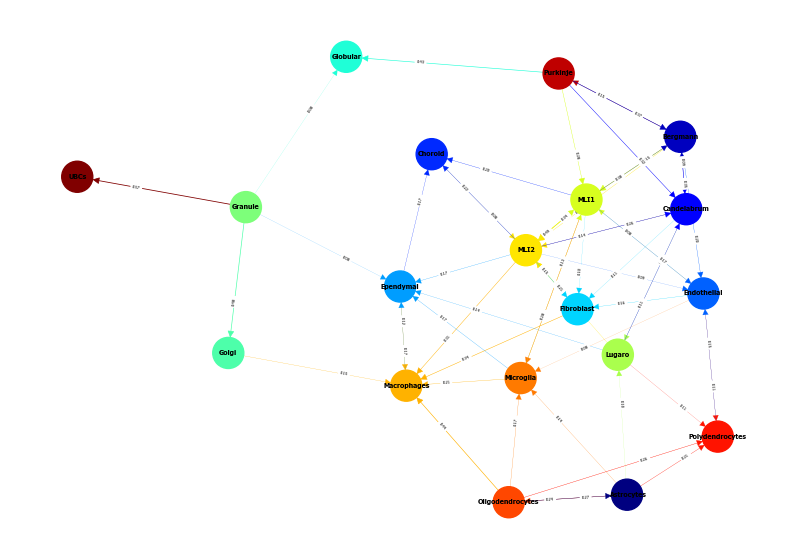

In [10]:

# Plot the niche interaction network with edge weight details for cutoff 0.08
sint.plot_niche_interactions_with_edge_weight(niche_pred_output,niche_cutoff=celltype_niche_interaction_cutoff,saveas=saveas,transparent_mode=transparent_mode)


The figures are saved:  ./nico_cerebellum/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.png


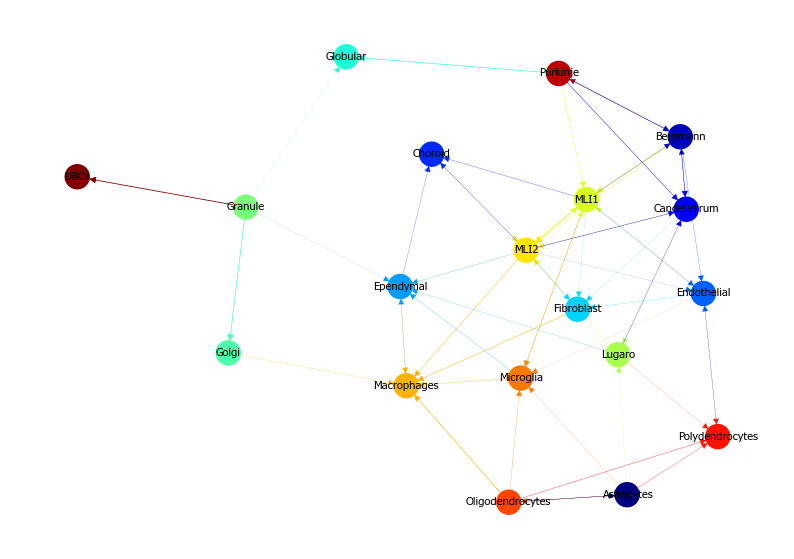

In [11]:
# Plot the niche interaction network without any edge weight details for cutoff 0.08

sint.plot_niche_interactions_without_edge_weight(niche_pred_output,niche_cutoff=celltype_niche_interaction_cutoff,saveas=saveas,transparent_mode=transparent_mode)


## Cell type niche plot individually 

Order niche cell types by magnitude of regression coefficients, <br> 
add celltype names to the list argument choose_celltypes, <br>
e.g., for the Purkinje and Bergmann cell type niche. 

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/TopCoeff_R0/Rank2_Purkinje.png
The figures are saved:  ./nico_cerebellum/niche_prediction_linear/TopCoeff_R0/Rank6_Bergmann.png


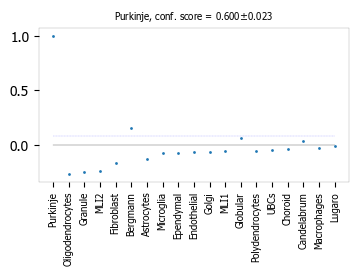

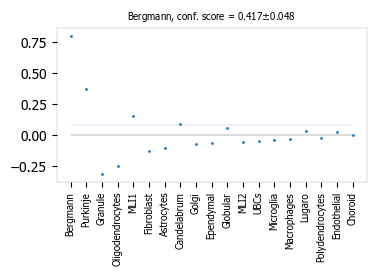

In [12]:
# Blue dotted line in following plot is celltype_niche_interaction_cutoff

sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=['Purkinje','Bergmann'],
celltype_niche_interaction_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,transparent_mode=transparent_mode,figsize=(4.0,2.0))



If niche cell types from the niche neighborhood of all central cell types should be plotted or saved, 
then leave choose_celltypes list argument empty. 

In [13]:
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

In [14]:
# Plot the ROC curve of the classifier prediction for one of the crossfolds. 
# sint.plot_roc_results(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode)

Plot the average confusion matrix of the classifier from cross-folds 

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/Confusing_matrix_R0.png


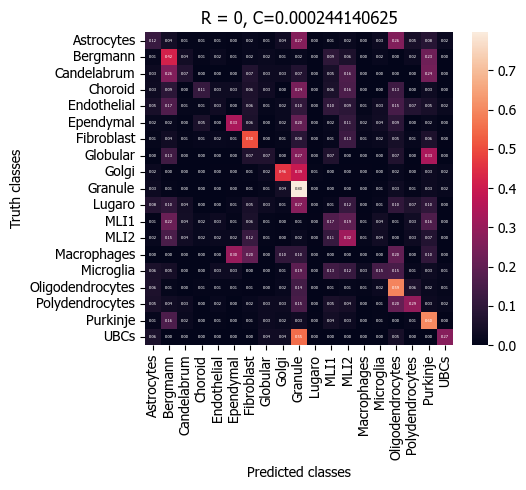

In [15]:
sint.plot_confusion_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode)

Plot the average coefficient matrix of the classifier from cross-folds 

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/weight_matrix_R0.png


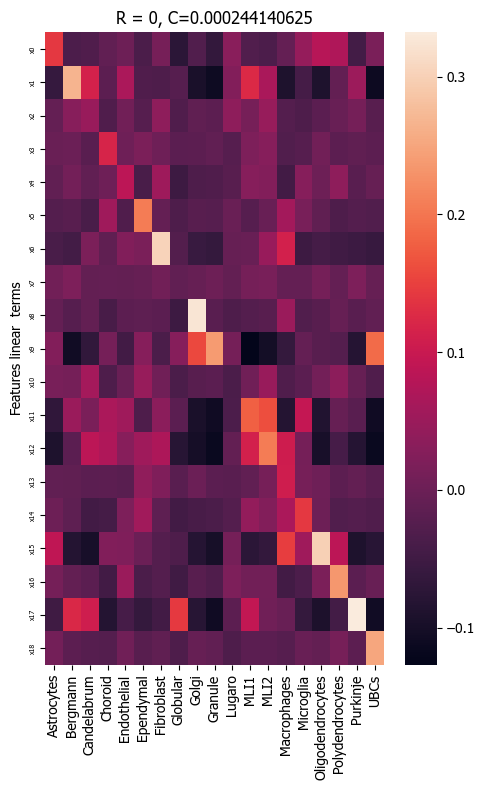

In [16]:
sint.plot_coefficient_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode)

In [17]:
#st.plot_predicted_probabilities(niche_pred_output)

Plot the evaluation score of the classifier for different metrics 

The figures are saved:  ./nico_cerebellum/niche_prediction_linear/scores_0.png


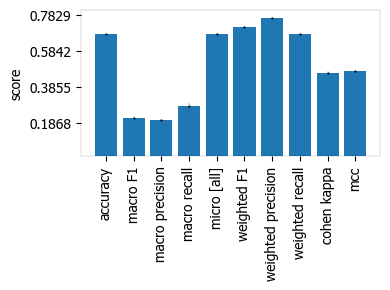

In [18]:
sint.plot_evaluation_scores(niche_pred_output, 
saveas=saveas, transparent_mode=transparent_mode, figsize=(4,3))

# Module C:  Perform niche cell state covariation analysis using latent factors

Note: From module C onwards, Jupyter cells are independent of previous steps. <br> 
Therefore, if you want to try different settings, you do not need to run the previous Jupyter cells.

### Covariations parameters settings 

Infer desired number of latent factors (e.g., no_of_factors=3) for each cell type. <br>
Here we use only one modalities using conventional non-negative matrix factorization. 

Set spatial_integration_modality='single' for applying the <br> 
conventional non-negative matrix factorization method <br> 
on unimodal spatial data without integration. 

In this case, latent factors will be derived from the spatial data alone. 

### Ligand-Receptor database file 
NiCoLRdb.txt is the name of the ligand-receptor database file. <br> 
Users can use databases of similar format from any resource.  

NiCoLRdb.txt was created by merging ligand-receptor pairs from NATMI, OMNIPATH, and CellPhoneDB. <br> 
User can download this database from github <br> 
and put into local directory <br> 
from where this notebook is getting run. 

In [19]:
# Note: gene_covariation_analysis step is not rewritable. 
# If you want to change any parameter then please delete the
# already generated covariations_R0_F3 directory and then run again.

# By default, it run in spatial_integration_modality='double' 


cov_out=scov.gene_covariation_analysis(Radius=inputRadius,
no_of_factors=3,
spatial_integration_modality='single',
anndata_object_name=annotation_save_fname,
output_niche_prediction_dir=output_nico_dir,
ref_cluster_tag=annotation_slot) #LRdbFilename='NiCoLRdb.txt'



common genes between sc and sp 5160 5160


### Visualize the cosine similarity and Spearman correlation between genes and latent factors 

Following function generates output for the top 30 genes <br> 
based on cosine similarity (left) or Spearman correlation (right) 

Select cell types by adding IDs to list argument choose_celltypes, <br>
or leave empty for generating output for all cell types

cell types found  ['Bergmann']
The figures are saved:  ./nico_cerebellum/covariations_R0_F3/NMF_output/Bergmann.png


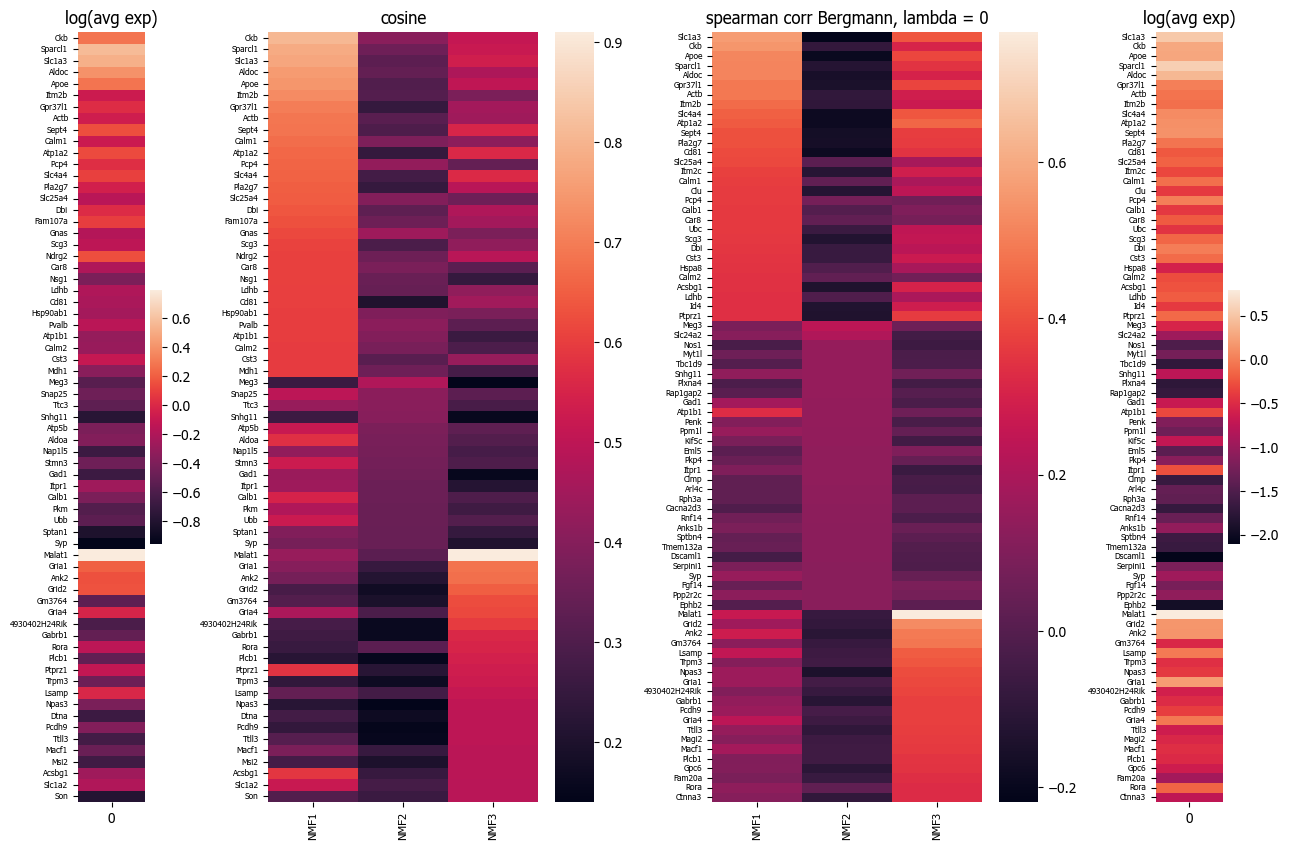

In [20]:
scov.plot_cosine_and_spearman_correlation_to_factors(cov_out,
choose_celltypes=['Bergmann'],
NOG_Fa=30,
saveas=saveas,transparent_mode=transparent_mode,
figsize=(15,10))

### Visualize genes in the latent factors along with average expression 

Call following function (scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype) to <br>
visualize correlation and expression of genes associated with factors 

For example, visualize and extract the top 20 genes (top_NOG=20) <br>
correlating negatively (positively_correlated=False) <br>
by Spearman correlation (correlation_with_spearman=True) <br>
for cell type Purkinje (choose_celltype='Purkinje') <br>
in factor 1 (choose_factor_id=1)


The figures are saved:  ./nico_cerebellum/covariations_R0_F3/dotplots/Factors_Purkinje.png


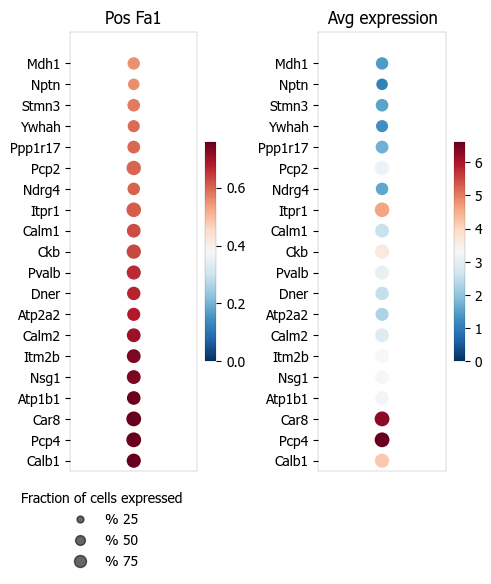

In [21]:
dataFrame=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(cov_out,
choose_celltype='Purkinje',
choose_factor_id=1,
top_NOG=20,correlation_with_spearman=True,positively_correlated=True,
saveas=saveas,transparent_mode=transparent_mode )

### Visualize the latent factor values and proportion of population expressed that gene 
inspect the top genes in the given factor as in table <br> 
proportion_of_population_expressed:  <br>
proportion of cells expressing a gene in the respective cluster 


In [22]:
dataFrame

,Gene,Fa,mean_expression,proportion_of_population_expressed
0,Calb1,0.758210,4.204801,0.844367
1,Pcp4,0.757111,6.616725,0.932249
2,Car8,0.756901,6.302749,0.934959
3,Atp1b1,0.752535,3.228417,0.773906
4,Nsg1,0.735999,3.327526,0.803329
5,Itm2b,0.735834,3.303136,0.802555
6,Calm2,0.702097,2.882307,0.795587
7,Atp2a2,0.681419,2.284940,0.708866
8,Dner,0.670894,2.528068,0.749129
9,Pvalb,0.661823,3.056523,0.839334


### Save the latent factors into excel sheet 
save data in an Excel sheet for each cell type, <br> 
including latent factor associations of all genes according to <br>
Spearman correlation and cosine similarity. 

In [ ]:
scov.make_excel_sheet_for_gene_correlation(cov_out)

# Module D: Cell type covariation visualization 

Plot covariations between niche cell types (x-axis) and central cell type <br>
(y-axis, defined by list argument choose_celltypes). 

Circle size scales with -log10(p-value) (indicated as number on top of each circle). <br>
To generate plots for all cell types, leave list argument choose_celltypes empty. 

In [ ]:

scov.plot_significant_regression_covariations_as_circleplot(cov_out,
choose_celltypes=['Bergmann'],
pvalue_cutoff=0.05,mention_pvalue=True,
saveas=saveas,transparent_mode=transparent_mode,
figsize=(6,1.25))

#In the following example, a p-value cutoff is explicitely defined by the pvalue_cutoff argument.
# p-value is printed as the -log10(p-value) on top of circle.
# circle color is the regression coefficients 

### Visualize as heatmap instead of circle plot 

Plot covariations between niche cell types (x-axis) and central cell type <br> 
(y-axis, defined by list argument choose_celltypes) as heatmap.

Leave list argument choose_celltypes empty to generate plots for all cell types. <br>
The top subfigure shows the coefficient and bottom subfigure shows the -log10(p-value). 

In [ ]:
scov.plot_significant_regression_covariations_as_heatmap(cov_out,
choose_celltypes=['Bergmann'],
saveas=saveas,transparent_mode=transparent_mode, figsize=(6,1.25))


# Module E: Analysis of ligand-receptor interactions within the cell type covariation state

### Save excelsheets and summary in text file    

Save all ligand-receptor interactions infered for each cell type niche in an Excel sheet,  <br>
and a summary of significant niche interactions in a text file. 


In [ ]:
scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(cov_out,
pvalueCutoff=0.05,correlation_with_spearman=True,
LR_plot_NMF_Fa_thres=0.1,LR_plot_Exp_thres=0.1,number_of_top_genes_to_print=5)


### Usage for ligand receptor visualizations 
Perform ligand-receptors analysis <br>
In this example, output is generated for the ligand-receptor pairs associated with the intercting  <br>
factor 1 of Stem/TA cells and factor 1 of Paneth cells. 

choose_interacting_celltype_pair=['Bergmann','Purkinje'] <br>
choose_factors_id=[1,1] entries correspond to cell types in choose_interacting_celltype_pai, i.e., <br>
first factor ID corresponds to Bergmann and second factor ID corresponds to Purkinje 

By default, the analysis is saved in 3 separate figures (bidirectional, CC to NC and NC to CC).  <br>
CC: central cell  <br>
NC: niche cell  <br>

Our analysis accounts for bidirectional cellular crosstalk interactions of ligands and receptors in cell types A and B. <br>
The ligand can be expressed on cell type A and signal to the receptor detected on cell type B, or vice versa. <br>

By changing the cutoff for minimum factor correlation of ligand/receptor genes (LR_plot_NMF_Fa_thres=0.2) <br>
or the cutoff for the minimum fraction of cells expressing the ligand/receptor genes (LR_plot_Exp_thres=0.2) the <br> 
stringency of the output filtering can be controled. 



In [ ]:
scov.find_LR_interactions_in_interacting_cell_types(cov_out,
choose_interacting_celltype_pair=['Bergmann','Purkinje'],
choose_factors_id=[1,1],
pvalueCutoff=0.05,
LR_plot_NMF_Fa_thres=0.15,
LR_plot_Exp_thres=0.15,
saveas=saveas,transparent_mode=transparent_mode,figsize=(12, 10))

Perform ligand-receptors analysis of the Bergmann cell niche including all significant interaction partners. <br>
choose_interacting_celltype_pair=['Bergmann']   <br>
generate plots for all cell types interacting sigificantly with Bergmann cells. <br>
choose_factors_id=[] if empty, generate plots for all significantly covarying factors


In [ ]:
#scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_interacting_celltype_pair=['Bergmann'],
 #   choose_factors_id=[], LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2,saveas=saveas,transparent_mode=transparent_mode)


# Module F: Perform functional enrichment analysis for genes associated with latent factors 

### Perform pathway enrichment analysis for factor-associated genes

In this example, pathway analysis is performed for top 50 (NOG_pathway=50) genes, <br>
positively correlated (positively_correlated=True) with <br>
factor 1 (choose_factors_id=[1]) of Bergmann cells (choose_celltypes=['Bergmann']) <br>
testing for enrichment of Bioplanet 2019  (database=['BioPlanet_2019']). <br>

If savefigure=True, then the figures will be saved in the respective folder. 

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Bergmann'],
NOG_pathway=50,
choose_factors_id=[1],
positively_correlated=True,
savefigure=False,database=['BioPlanet_2019'])

In this example, pathway analysis is performed for top 50 (NOG_pathway=50) genes, 
negatively correlated (positively_correlated=False) 
with factor 1 (choose_factors_id=[2])
of Stem/TA cells (choose_celltypes=['Stem/TA'])
testing for enrichment of GO Biological Processes (database=['GO_Biological_Process_2021']).

If savefigure=True, then the figures will be saved in the respective folder. 


In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Purkinje'],
NOG_pathway=50,
choose_factors_id=[1],
positively_correlated=True,
savefigure=False,database=['BioPlanet_2019'])

# Module G: Visualization of top genes across cell type and factors as dotplot 
Show the top 20 positively and negatively correlated genes (top_NOG=20) for all latent factors and <br>
the average expression of these genes on a log scale in a single plot. <br>
In this example, plots are generated for Purkinje and Bergmann cells. 

If the choose_celltypes=[], the plot will be generated for all cell types. 

In [ ]:
scov.plot_top_genes_for_pair_of_celltypes_from_two_chosen_factors(cov_out,
choose_interacting_celltype_pair=['Purkinje','Bergmann'],
visualize_factors_id=[1,1],
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode)

In [ ]:


scov.plot_top_genes_for_a_given_celltype_from_all_three_factors(cov_out,
choose_celltypes=['Bergmann','Purkinje'],
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode)



# Module H: Visualize factor values in the UMAP

Visualize factor values for select cell types, e.g., <br>
Bergmann and Purkinje cells (choose_interacting_celltype_pair=['Bergmann','Purkinje']) in spatial data umap. <br>
Select factors for each cell type (visualize_factors_id=[1,1]).  <br>


In [ ]:
scov.visualize_factors_in_spatial_umap(cov_out,
visualize_factors_id=[1,1],
umap_tag='X_umap',
choose_interacting_celltype_pair=['Bergmann','Purkinje'],
saveas=saveas,transparent_mode=transparent_mode,figsize=(8,3.5))


In [ ]:
scov.visualize_factors_in_spatial_umap(cov_out,
visualize_factors_id=[1],
umap_tag='X_umap',
choose_interacting_celltype_pair=['Bergmann'],
saveas=saveas,transparent_mode=transparent_mode,figsize=(4,3.5))